In [18]:
import numpy as np 
import pandas as pd
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
import os

In [19]:
image_size= 32

dir_base='C:\\Users\\ragav\\Downloads\\chest_xray'
test_dir = '{}/{}'.format(dir_base, 'test')
train_dir = '{}/{}'.format(dir_base, 'train')
val_dir = '{}/{}'.format(dir_base, 'val')

test_dir_normal_cases = '{}/{}/{}'.format(dir_base, 'test','NORMAL')
train_dir_normal_cases = '{}/{}/{}'.format(dir_base, 'train','NORMAL')
val_dir_normal_cases = '{}/{}/{}'.format(dir_base, 'val','NORMAL')

test_dir_pneumonia_cases = '{}/{}/{}'.format(dir_base, 'test','PNEUMONIA')
train_dir_pneumonia_cases = '{}/{}/{}'.format(dir_base, 'train','PNEUMONIA')
val_dir_pneumonia_cases = '{}/{}/{}'.format(dir_base, 'val','PNEUMONIA')

In [20]:
def get_data(path,label,data_type,process_flipped):
    result = []
    items = os.listdir(path)
    for i in items:
        img_path = '{}/{}/{}/{}'.format(dir_base,data_type,label,i)
        result.append((get_image_arr(img_path),label))
        if process_flipped == True:
            result.append((get_flipped_image_arr(img_path),label))
    return pd.DataFrame(result, columns=['image', 'label'],index=None)

In [21]:
def get_flipped_image_arr(path):
        original = cv2.imread(path) 
        img = cv2.flip(original, 1)
        img = cv2.resize(img, (image_size, image_size),interpolation = cv2.INTER_AREA).reshape(1,-1)
        return img

In [22]:
def get_image_arr(path):
        img = cv2.imread(path) 
        img = cv2.resize(img, (image_size, image_size),interpolation = cv2.INTER_AREA).reshape(1,-1)
        return img

In [23]:
def show_plot(k_values,accuracy_values):
    fig = plt.figure()
    fig.subplots_adjust(top=0.8)
    ax1 = fig.add_subplot()
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('K value')
    plt.plot(k_values,accuracy_values,label='Accuracy for k params')
    plt.scatter(k_values,accuracy_values,c=k_values,alpha=1)
    plt.legend()
    plt.show()

In [24]:
def show_confusion_matrix(model,x,y):
    disp = plot_confusion_matrix(model, x, y,
                             cmap=plt.cm.Blues,
                             normalize=None)
    plt.show()

In [27]:
data_normal = get_data(train_dir_normal_cases,'NORMAL','train',True)
data_pneumonia = get_data(train_dir_pneumonia_cases,'PNEUMONIA','train',False)

In [28]:
data = pd.concat([data_normal,data_pneumonia])
images = data.image
y = data.label

X = []
for i in images.values:
    X.append(i[0])
X = np.array(X)

In [29]:
print('X shape:',X.shape)
print('Y shape:',y.shape)

X shape: (6569, 3072)
Y shape: (6569,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=30)

In [31]:
print('X train shape:',X_train.shape)
print('Y train shape:',y_train.shape)

print('X train shape:',X_test.shape)
print('Y train shape:',y_test.shape)

X train shape: (1970, 3072)
Y train shape: (1970,)
X train shape: (4599, 3072)
Y train shape: (4599,)


In [32]:
print('Classes: ',np.unique(y_train))

Classes:  ['NORMAL' 'PNEUMONIA']


Accuracy for k=1: 0.9219395520765383


              precision    recall  f1-score   support

      NORMAL       0.93      0.88      0.90      1864
   PNEUMONIA       0.92      0.95      0.94      2735

    accuracy                           0.92      4599
   macro avg       0.92      0.91      0.92      4599
weighted avg       0.92      0.92      0.92      4599



Accuracy for k=3: 0.9375951293759512


              precision    recall  f1-score   support

      NORMAL       0.95      0.89      0.92      1864
   PNEUMONIA       0.93      0.97      0.95      2735

    accuracy                           0.94      4599
   macro avg       0.94      0.93      0.93      4599
weighted avg       0.94      0.94      0.94      4599



Accuracy for k=5: 0.9408567079799957


              precision    recall  f1-score   support

      NORMAL       0.96      0.89      0.92      1864
   PNEUMONIA       0.93      0.97      0.95      2735

    accuracy                           0.94      4599
   macr

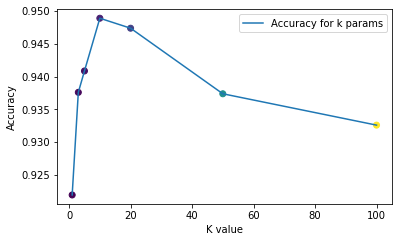

In [33]:
k_values = [1, 3, 5, 10, 20, 50, 100]
accuracy_values = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, predictions)
    accuracy_values.append(acc)
    print('Accuracy for k={}:'.format(str(k)),acc)
    print('\n')
    print(classification_report(y_test, predictions))
    print('=========================================================')
    print('\n')
show_plot(k_values,accuracy_values)



In [34]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

In [35]:
#Load test data
test_data_normal = get_data(test_dir_normal_cases,'NORMAL','test',False)
test_data_pneumonia = get_data(test_dir_pneumonia_cases,'PNEUMONIA','test',False)

test_data_total = pd.concat([test_data_normal,test_data_pneumonia])

y_test_data = test_data_total.label

X_test_data = []
for i in test_data_total.image.values:
    X_test_data.append(i[0])
    
X_test_data = np.array(X_test_data)

Accuracy for test 0.7980769230769231
              precision    recall  f1-score   support

      NORMAL       0.94      0.49      0.65       234
   PNEUMONIA       0.76      0.98      0.86       390

    accuracy                           0.80       624
   macro avg       0.85      0.74      0.75       624
weighted avg       0.83      0.80      0.78       624



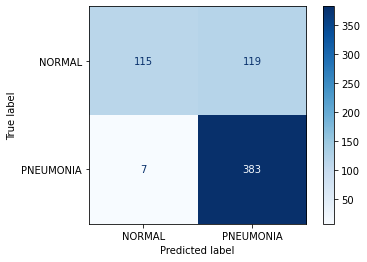

In [36]:
predictions_test = knn_model.predict(X_test_data)
acc_test = metrics.accuracy_score(y_test_data, predictions_test)
print('Accuracy for test',acc_test)
print(classification_report(y_test_data, predictions_test))
show_confusion_matrix(knn_model,X_test_data,y_test_data)

In [37]:
pred=knn_model.predict(X_test_data[:1])
print(pred)

['NORMAL']


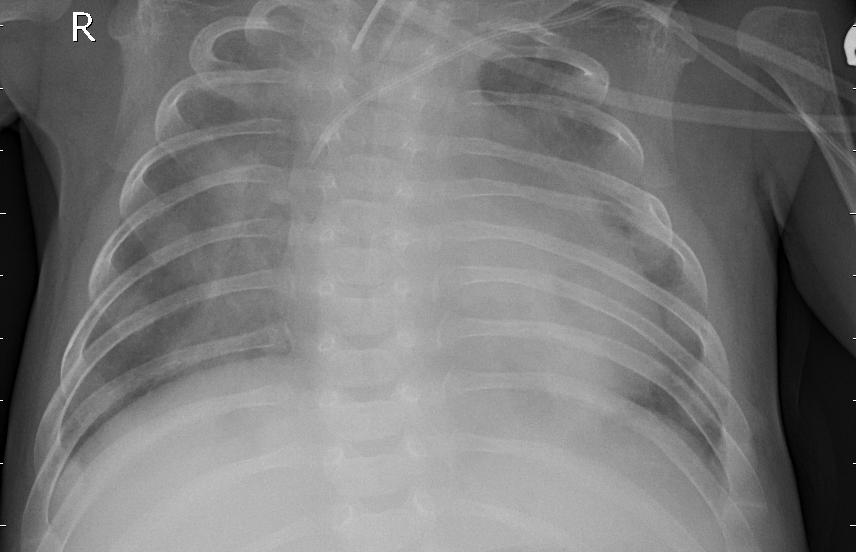

In [47]:
from IPython import display 
display.Image('person1_virus_9.jpeg')

In [48]:
img = cv2.imread('person1_virus_9.jpeg')
img = img = cv2.resize(img, (image_size, image_size),interpolation = cv2.INTER_AREA).reshape(1,-1)
predd=knn_model.predict(img)
print(predd)

['PNEUMONIA']


In [50]:
img = cv2.imread('IM-0001-0001.jpeg')
img = cv2.resize(img, (image_size, image_size),interpolation = cv2.INTER_AREA).reshape(1,-1)
predd=knn_model.predict(img)
print(predd)

['NORMAL']


In [ ]:
#---------------------------------------------------------------------------------------------------------------------------